[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.1_mnist_cnn.ipynb)

## import

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()
'''

In [1]:
import numpy as np
import tensorflow as tf

# 파일 경로 설정 (환경에 맞게 수정하세요)
mnist_path = '../dataset/mnist/mnist.npz'  # 윈도우 예시
#mnist_path = 'D:/datasets/mnist.npz'  # 윈도우 예시
# mnist_path = '/home/user/datasets/mnist.npz'  # 리눅스 예시

# npz 파일 직접 로드
with np.load(mnist_path) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_valid = data['x_test']
    y_valid = data['y_test']

# 데이터 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_valid.shape, y_valid.shape)

# 정규화
#x_train = x_train / x_train.max()
#x_valid = x_valid / x_valid.max()

print("x_train[0, 10:15, 10:15] = " + repr(x_train[0, 10:15, 10:15]))
print("x_test[0, 10:15, 10:15] = " + repr(x_valid[0, 10:15, 10:15]))

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)
x_train[0, 10:15, 10:15] = array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)
x_test[0, 10:15, 10:15] = array([[ 0, 17, 66, 14, 67],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=uint8)


In [2]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


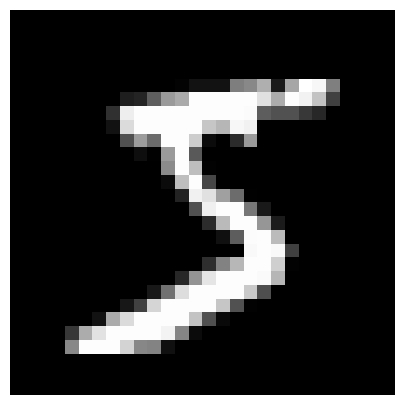

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## Simple CNN

In [7]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2148 - accuracy: 0.9389 - val_loss: 0.0932 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.0681 - val_accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0599 - accuracy: 0.9822 - val_loss: 0.0563 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0525 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0519 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0479 - val_ac

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9845


[0.05332816764712334, 0.984499990940094]

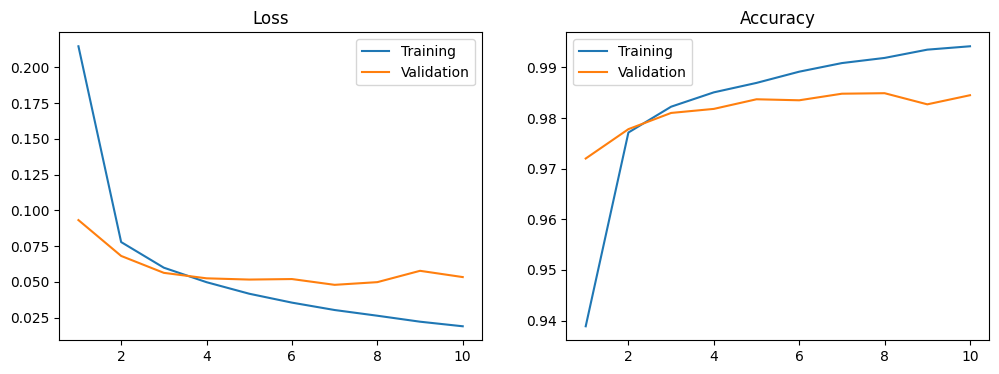

In [10]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

## CNN 레이어 중간 출력값을 시각화

In [12]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어 
model.layers

In [16]:
# 첫번째 레이어 선택
model.layers[0]

In [17]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.33937207,  0.38185507, -1.4003682 ,  0.16690941,
           -0.21521689, -0.27821952, -0.7155084 , -0.7107104 ,
            0.3579432 , -0.61289763,  0.11260737, -0.5921437 ,
           -0.5149167 , -0.34190157,  0.19253212, -0.34822857,
           -0.7222784 , -0.05705532,  0.09288196, -0.3618541 ,
            0.17601082, -1.3859354 , -0.13196962, -0.3151967 ,
            0.36967802,  0.44744956, -0.9192482 ,  0.05052628,
            0.2525122 ,  0.13616039,  0.3568321 ,  0.20412233]],
 
         [[ 0.3219729 , -0.08259223, -1.0220667 , -0.02463887,
           -0.617304  , -0.17257555, -1.27394   ,  0.03117558,
           -0.03127552, -0.5029375 , -0.61786073,  0.11013933,
            0.27741283,  0.00921672,  0.49309307, -0.36346596,
            0.12390508,  0.13515988,  0.2724949 , -0.07851645,
            0.5332156 , -0.78543925,  0.00385215,  0.36673722,
           -0.07101404, -0.22334872, -0.20

In [20]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.33937207,  0.38185507, -1.4003682 ,  0.16690941,
          -0.21521689, -0.27821952, -0.7155084 , -0.7107104 ,
           0.3579432 , -0.61289763,  0.11260737, -0.5921437 ,
          -0.5149167 , -0.34190157,  0.19253212, -0.34822857,
          -0.7222784 , -0.05705532,  0.09288196, -0.3618541 ,
           0.17601082, -1.3859354 , -0.13196962, -0.3151967 ,
           0.36967802,  0.44744956, -0.9192482 ,  0.05052628,
           0.2525122 ,  0.13616039,  0.3568321 ,  0.20412233]],

        [[ 0.3219729 , -0.08259223, -1.0220667 , -0.02463887,
          -0.617304  , -0.17257555, -1.27394   ,  0.03117558,
          -0.03127552, -0.5029375 , -0.61786073,  0.11013933,
           0.27741283,  0.00921672,  0.49309307, -0.36346596,
           0.12390508,  0.13515988,  0.2724949 , -0.07851645,
           0.5332156 , -0.78543925,  0.00385215,  0.36673722,
          -0.07101404, -0.22334872, -0.20113146, -0.606934

In [21]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.33941942, -0.18132931, -0.0553479 , -0.28060845, -0.01328219,
       -0.24179423, -0.01337297, -0.15656143, -0.2595828 , -0.00305918,
       -0.09113007, -0.15981662, -0.17481849, -0.16601962, -0.38302898,
        0.00227986, -0.02985123, -0.24307285, -0.16489562, -0.25750008,
       -0.04437247, -0.0120691 , -0.01018807,  0.24568579, -0.3561718 ,
       -0.43314606, -0.07787969, -0.11280153, -0.02016799, -0.1019436 ,
       -0.29343903, -0.1738207 ], dtype=float32)>

In [22]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

1/1 [==============================] - 0s 74ms/step


2

In [24]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

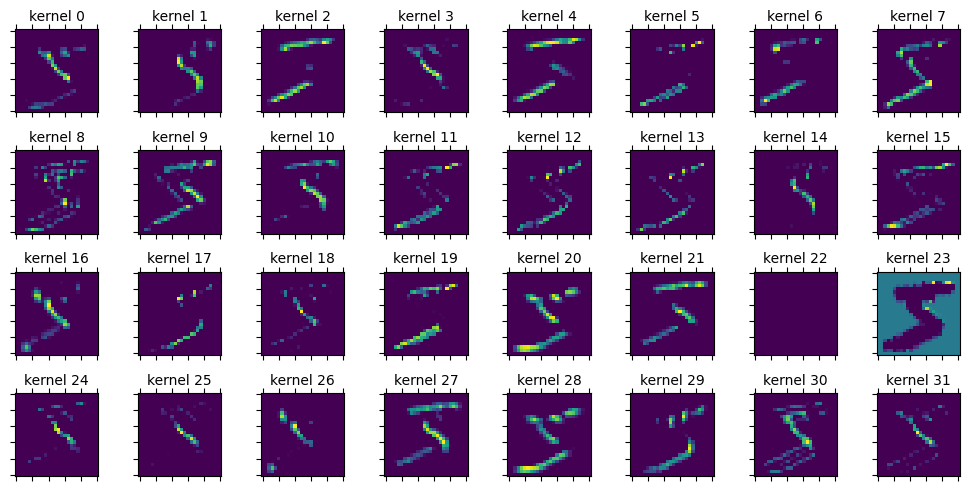

In [25]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


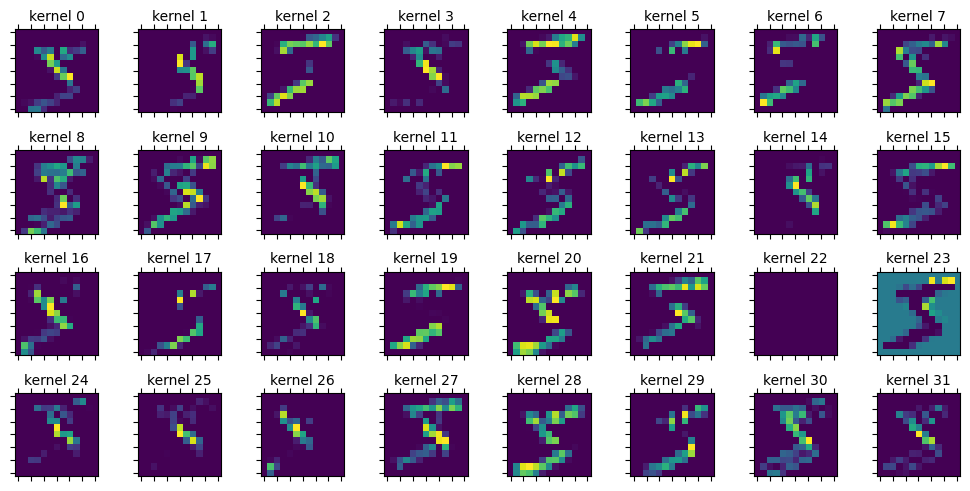

In [27]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()